### **Assignment 1: (Simple Linear Regression)**

Use the dataset below to build a Simple Linear Regression.

The dataset contains the Years of Experience and Salaries of a number of employees.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
salary_data = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/simple-Linear-Regression/master/Salary_Data.csv", sep=",")

Perform data pre-processing, visualize the dataset to understand your data

In [3]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
#general descriptive statistics
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


normalize data

In [17]:
salary_data['log_Salary'] = np.log(salary_data['Salary'])

In [18]:
salary_data.head(5)

,YearsExperience,Salary,log_Salary
0,1.1,39343.0,10.580073
1,1.3,46205.0,10.740843
2,1.5,37731.0,10.538237
3,2.0,43525.0,10.681091
4,2.2,39891.0,10.593906


Text(0.5, 0, 'Years of Experience')

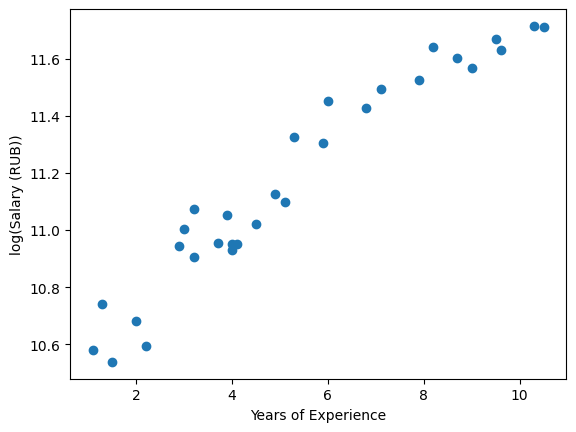

In [19]:
plt.scatter(salary_data['YearsExperience'], salary_data['log_Salary'])
plt.ylabel('log(Salary (RUB))')
plt.xlabel('Years of Experience')

min-max scaler

In [21]:
from sklearn.preprocessing import MinMaxScaler

scalerMM_salary = MinMaxScaler()

In [30]:
salary_data['Salary_Scaled_MM'] = scalerMM_salary.fit_transform(salary_data['Salary'].values.reshape(-1, 1))

In [31]:
salary_data.head()

,YearsExperience,Salary,log_Salary,Salary_Scaled_MM
0,1.1,39343.0,10.580073,0.019041
1,1.3,46205.0,10.740843,0.100094
2,1.5,37731.0,10.538237,0.000000
3,2.0,43525.0,10.681091,0.068438
4,2.2,39891.0,10.593906,0.025514


Text(0.5, 0, 'Years of Experience')

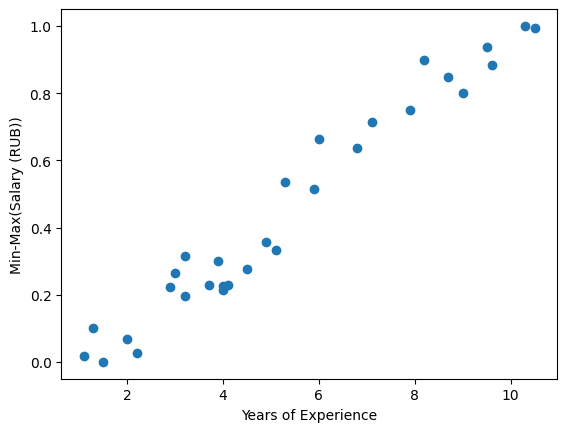

In [33]:
plt.scatter(salary_data['YearsExperience'], salary_data['Salary_Scaled_MM'])
plt.ylabel('Min-Max(Salary (RUB))')
plt.xlabel('Years of Experience')

In [7]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Text(0.5, 0, 'Years of Experience')

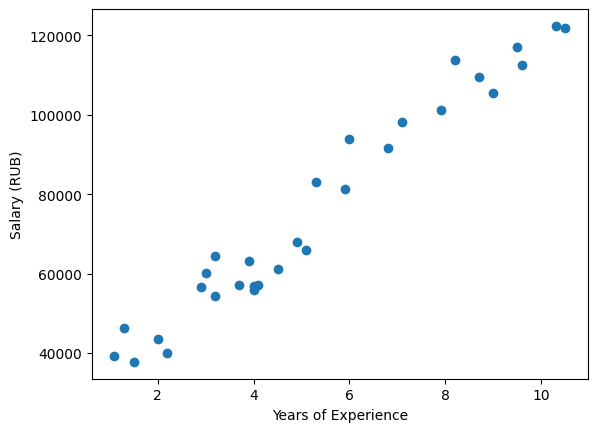

In [14]:
plt.scatter(salary_data['YearsExperience'], salary_data['Salary'])
plt.ylabel('Salary (RUB)')
plt.xlabel('Years of Experience')

train-test split

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( salary_data['YearsExperience'], salary_data['Salary_Scaled_MM'], train_size=0.7, shuffle=True,
                                                     random_state=100)

In [80]:
print("X (train, test) samples: ",X_train.shape, X_test.shape)
print("Y (train, test) samples: ",Y_train.shape, Y_test.shape)

X (train, test) samples:  (21,) (9,)
Y (train, test) samples:  (21,) (9,)


learn - build model

In [36]:
from sklearn.linear_model import LinearRegression

In [81]:
#initialize the model
lr_model_simple = LinearRegression()

In [82]:
print(X_train.values.shape)
X_train.values

(21,)


array([ 5.3,  7.9,  4. ,  2.2, 10.5,  1.1,  1.3,  5.9,  4.5,  6. ,  7.1,
        1.5,  6.8,  3.9,  5.1,  4.9,  8.2,  3.2,  2. ,  8.7,  3.2])

In [55]:
print(X_train.values.reshape(-1,1).shape)
X_train.values.reshape(-1,1)

(21, 1)


array([[ 5.3],
       [ 7.9],
       [ 4. ],
       [ 2.2],
       [10.5],
       [ 1.1],
       [ 1.3],
       [ 5.9],
       [ 4.5],
       [ 6. ],
       [ 7.1],
       [ 1.5],
       [ 6.8],
       [ 3.9],
       [ 5.1],
       [ 4.9],
       [ 8.2],
       [ 3.2],
       [ 2. ],
       [ 8.7],
       [ 3.2]])

In [83]:
lr_model_simple.fit(X_train.values.reshape(-1, 1) , Y_train.values.reshape(-1, 1))

LinearRegression()

In [84]:
lr_model_simple.intercept_

array([-0.14798148])

In [85]:
lr_model_simple.coef_

array([[0.11494453]])

In [62]:
# y = ax + b
#predicting the salary of a person who has worked for 3 years and 11 months
formula_salary_prediction = lr_model_simple.coef_ * 3.11 + lr_model_simple.intercept_
formula_salary_prediction

array([[55466.9317231]])

test / evaluate how good the model is

In [86]:
Y_pred = lr_model_simple.predict(X_test.values.reshape(-1, 1))

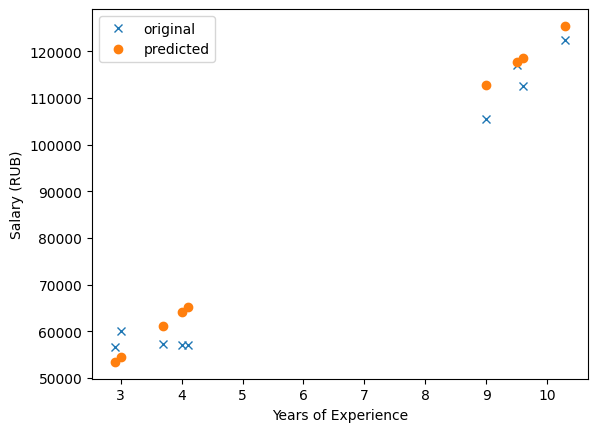

In [77]:
plt.plot(X_test, Y_test, 'x', label='original')
plt.plot(X_test, Y_pred, 'o', label='predicted')
plt.ylabel('Salary (RUB)')
plt.xlabel('Years of Experience')
plt.legend()
plt.show()

In [78]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("R-squared: ", r2_score(Y_test, Y_pred))

print("Accuracy: ", lr_model_simple.score(X_test.values.reshape(-1, 1), Y_test.values.reshape(-1, 1)),"%")

Mean Absolute Error: 5010.529885004963
Mean Squared Error:  30310299.043402553
RMSE:  5505.4790021761555
R-squared:  0.9627668685473266
Accuracy:  0.9627668685473266 %


In [87]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("R-squared: ", r2_score(Y_test, Y_pred))

print("Accuracy: ", lr_model_simple.score(X_test.values.reshape(-1, 1), Y_test.values.reshape(-1, 1)),"%")

Mean Absolute Error: 0.059184146999822315
Mean Squared Error:  0.00422896112505531
RMSE:  0.06503046305428949
R-squared:  0.9627668685473266
Accuracy:  0.9627668685473266 %


Calculate the following: 

- Metrics (**MAE MSE, RMSE, R-squared**)
- Model Accuracy (%)
- Represent the linear regression model (formula)?
- What will the **salary of someone with 27 years of experience** be?
- Predict the **Average Salary** of people with work of experience of 1,2,3,4 & 5 years?